# Figure 1. The oviINs high level of inputs and outputs visualized
- Import all cell-type connectivity in the hemibrain
- Isolate inputs and outputs to the cell-types
- Plot these and label the oviINs

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuprint import Client, fetch_neurons, NeuronCriteria as NC


auth_token_file = open("/Users/rhessa/flybrain-clustering/flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Import all cell type data from neuprint
all_ns = NC(status='Traced')
cell_types = fetch_neurons(all_ns)
cell_types

/Users/rhessa/miniconda3/envs/flybrainlab/lib/python3.11/site-packages/neuprint/client.py:609: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neuron_props_val = df_results.iloc[0][0]


(           bodyId         instance    type   pre  post  downstream  upstream  \
 0       198469830             None    None     0     0           0         0   
 1       198810827             None    None     0     0           0         0   
 2       198815212             None    None     0     0           0         0   
 3       199147536             None    None     0     0           0         0   
 4       199156210             None    None     0     0           0         0   
 ...           ...              ...     ...   ...   ...         ...       ...   
 97895  7112622044  LAL137(PVL05)_L  LAL137  1376  2087       11635      2087   
 97896  7112622236             None    None     5    79          22        79   
 97897  7112623021             None    None   104   503         445       503   
 97898  7112623023             None    None    28    17         205        17   
 97899  7112623383             None    None     5    34          42        34   
 
        mito        size  

In [3]:
# Edit dataframe for easier usage
types = cell_types[0][['instance', 'pre', 'post']].copy()
types

,instance,pre,post
0,None,0,0
1,None,0,0
2,None,0,0
3,None,0,0
4,None,0,0
...,...,...,...
97895,LAL137(PVL05)_L,1376,2087
97896,None,5,79
97897,None,104,503
97898,None,28,17


In [4]:
# Collapse all cell type instances and sum the pre and post counts
types = types.groupby('instance').sum()
types

,pre,post
instance,,
(ADL08)_L,1463,1179
(ADM01)_L,5905,12844
(ADM03)_L,1596,9608
(ADM03)_R,173,263
(ADM04)_L,2208,7083
...,...,...
vLN27_R,452,1229
vLN28_R,232,1244
vLN29_R,232,1242


In [5]:
# Add a color column where oviIN is red, and the rest are blue
types['color'] = 'blue'
types.loc['oviIN_R', 'color'] = 'red'
types.loc['oviIN_L', 'color'] = 'red'
types

,pre,post,color
instance,,,
(ADL08)_L,1463,1179,blue
(ADM01)_L,5905,12844,blue
(ADM03)_L,1596,9608,blue
(ADM03)_R,173,263,blue
(ADM04)_L,2208,7083,blue
...,...,...,...
vLN27_R,452,1229,blue
vLN28_R,232,1244,blue
vLN29_R,232,1242,blue


In [7]:
# Find the exact number of synapses for oviIN, see what number it ranks
print(types.loc['oviIN_R'])
print(types.loc['oviIN_L'])

pre       6863
post     23029
color      red
Name: oviIN_R, dtype: object
pre       6542
post     15998
color      red
Name: oviIN_L, dtype: object


In [21]:
# Print out types from highest to lowest 
types1 = types.sort_values(by='post', ascending=False)
types1

,pre,post,color
instance,,,
KCg-m_R,139932,450018,blue
KCab-m_R,69956,190753,blue
KCab-s_R,51586,131619,blue
APL_R,16190,127151,blue
LC10,48694,106421,blue
...,...,...,...
Out-of-bounds,2,5,blue
(PVM02)_R,0,5,blue
(AVL22)_R,0,2,blue


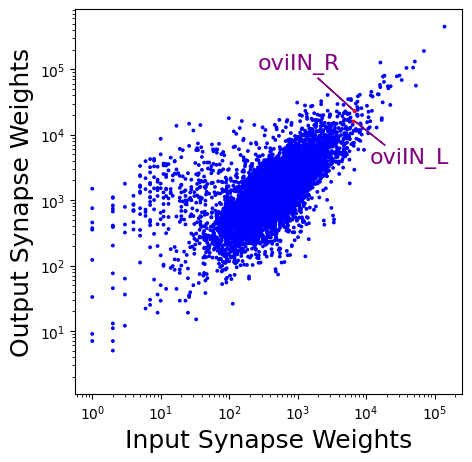

In [13]:
# Plot the data
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(types['pre'], types['post'], marker='o', c=types['color'], s=3)
ax.set_xlabel('Input Synapse Weights', fontsize=18)
ax.set_ylabel('Output Synapse Weights', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')

# Add in arrows to the two oviINs
ax.annotate('oviIN_R', (types.loc['oviIN_R', 'pre'], types.loc['oviIN_R', 'post']), textcoords="offset points", xytext=(-40,30), ha='center', fontsize=16, color='purple')
ax.annotate('oviIN_L', (types.loc['oviIN_L', 'pre'], types.loc['oviIN_L', 'post']), textcoords="offset points", xytext=(40,-30), ha='center', fontsize=16, color='purple')

# Add in an arrow from the label to the point
ax.arrow(types.loc['oviIN_R', 'pre']-400, types.loc['oviIN_R', 'post']+1000, -4500, 50000, color='purple')
ax.arrow(types.loc['oviIN_L', 'pre']+400, types.loc['oviIN_L', 'post']-100, 12000, -9000, color='purple')